In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [58]:
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

In [59]:
with open('aldol_1.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [60]:
data = np.array(data[0]).astype(float)

In [61]:
xs = np.array(range(len(data)))

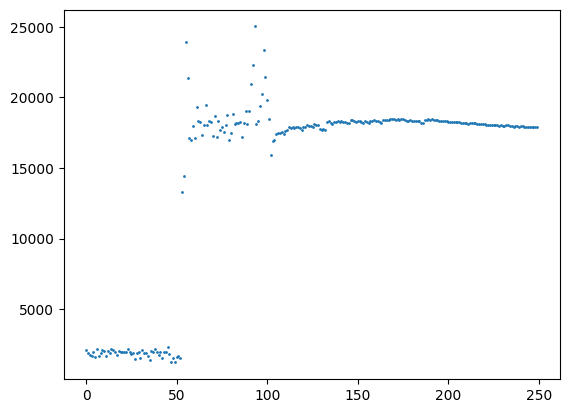

In [62]:
plt.scatter(xs[:250],data[:250],s=1,alpha=1,marker='o')
plt.show()

In [63]:
data[90:110]

array([19040., 20920., 22330., 25030., 18090., 18330., 19360., 20220.,
       23340., 21470., 19820., 18460., 15920., 16890., 16960., 17440.,
       17450., 17490., 17540., 17420.])

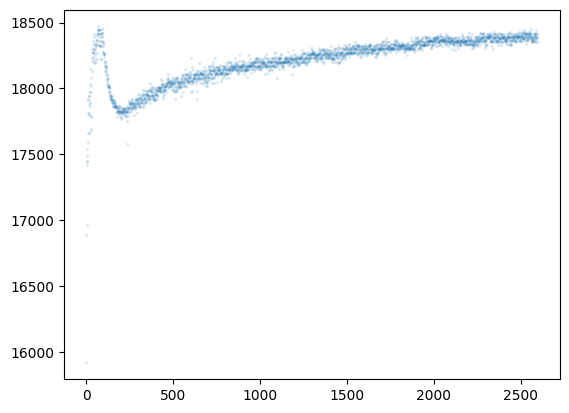

In [64]:
x = xs[102:] - 102 # not certain on start!
y = data[102:]
plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.show()

In [12]:
y[:10]

array([17440., 17450., 17490., 17540., 17420., 17590., 17660., 17920.,
       17810., 17910.])

In [22]:
# looking for dip below 17800
y[190:250]

array([17830., 17830., 17810., 17810., 17830., 17830., 17860., 17780.,
       17780., 17770., 17820., 17820., 17810., 17810., 17830., 17850.,
       17840., 17830., 17820., 17810., 17850., 17840., 17840., 17800.,
       17830., 17840., 17830., 17830., 17840., 17810., 17840., 17800.,
       17820., 17830., 17860., 17820., 17790., 17780., 17850., 17580.,
       17750., 17820., 17830., 17830., 17820., 17850., 17790., 17820.,
       17850., 17870., 17850., 17850., 17910., 17900., 17890., 17840.,
       17870., 17860., 17880., 17890.])

In [28]:
y = np.delete(y,x[5:190])
x = np.delete(x, x[5:190])
plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.show()

In [65]:
IR_ = pd.read_csv('aldol_1_ir.txt',sep="\t")

In [66]:
IR_

,DateTime,Peak at 1452 cm-1
0,00:00:10.605,0.000059
1,00:00:25.642,0.235972
2,00:00:40.576,0.235769
3,00:00:55.600,0.200810
4,00:01:10.634,0.198539
...,...,...
286,01:11:41.199,0.028594
287,01:11:56.181,0.028643
288,01:12:11.158,0.028780
289,01:12:26.160,0.028516


<Axes: >

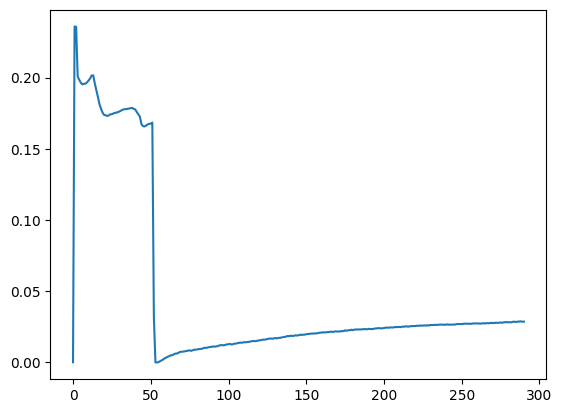

In [67]:
IR_[IR_.columns[1]].plot()

In [68]:
ir_ = np.array(IR_[IR_.columns[1]])

In [69]:
ir_[50:60]

array([ 1.67704525e-01,  1.68427479e-01,  3.20774543e-02,  0.00000000e+00,
       -1.18404581e-04,  1.52044449e-04,  7.29812020e-04,  1.38313797e-03,
        2.00138150e-03,  2.81746707e-03])

In [70]:
ir_clean = ir_[53:]

In [71]:
ir_clean.shape

(238,)

In [72]:
ir_xs = np.array(range(0,len(ir_clean)*15,15))

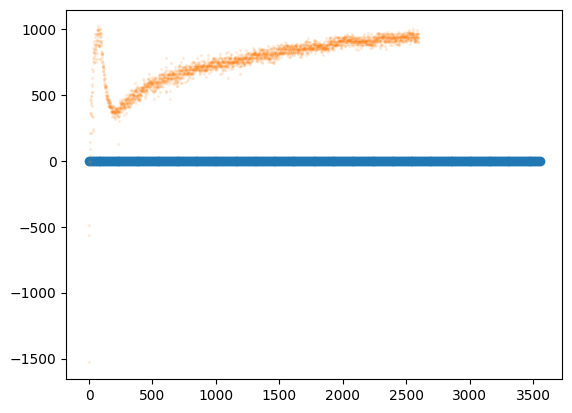

In [73]:
plt.scatter(ir_xs,ir_clean)
plt.scatter(x,y - y[4],s=2,alpha=0.1,marker='o')
plt.show()

In [74]:
len(y)

2597

In [90]:
# lets try some streching!!!
ir_end = np.mean(ir_clean[int(3500/15)-10:int(3500/15)])
cond_end = np.mean(y[len(y)-10:len(y)] - 17720)

In [91]:
cond_end

671.0

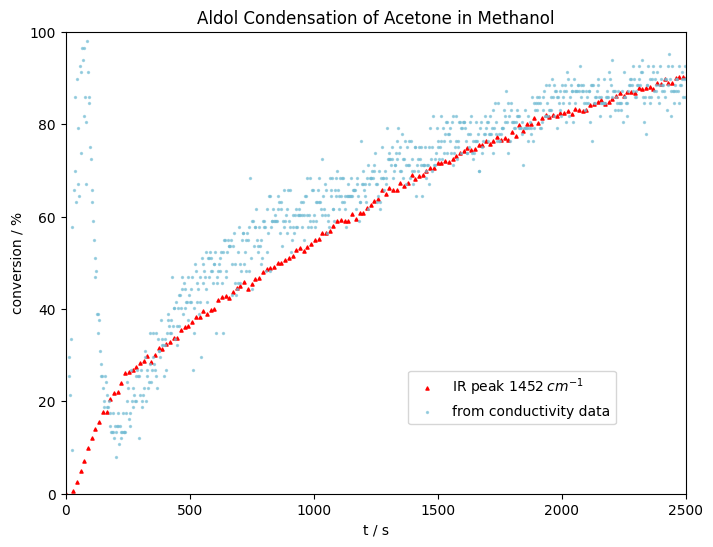

In [118]:
plt.figure(figsize=(8,6))

plt.scatter(ir_xs[:int(len(y)/15)],100*ir_clean[:int(len(y)/15)]/ir_end,s=5,c='r',marker='^',label="IR peak $1452 \hspace{.2} cm^{-1}$")
plt.scatter(x[::3],90 * (y[::3] - 17720)/cond_end,c='#72bcd4',s=2,alpha=0.6,marker='o',label="from conductivity data")

plt.title('Aldol Condensation of Acetone in Methanol')
plt.xlabel('t / s')
plt.ylabel('conversion / %')
plt.ylim((0,100))
plt.xlim((0,2500))
plt.legend(loc=4,borderaxespad=5)

plt.show()

In [89]:
(ir_clean/ir_end)[int(2500/15)]

0.9021745845174118

In [119]:
100*1000/17500

5.714285714285714